In [ ]:
import os
os.kill(os.getpid(), 9)

In [2]:
# PyTorch with Triton 3.1.0
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [3]:
!mkdir -p /usr/local/lib
!ln -sf /usr/lib64-nvidia/libcuda.so /usr/local/lib/libcuda.so

In [4]:
!find /usr -name "build.py" | grep triton

/usr/local/lib/python3.11/dist-packages/triton/runtime/build.py


In [5]:
path = "/usr/local/lib/python3.11/dist-packages/triton/runtime/build.py"

with open(path, "r") as f:
    lines = f.readlines()

patched_lines = []
for line in lines:
    if "dirs = [" in line:
        patched_lines.append('    dirs = ["/usr/lib64-nvidia", "/usr/local/lib"]  # patched\n')
    elif "assert any(os.path.exists(" in line:
        patched_lines.append('    # assertion disabled for libcuda.so\n')
    else:
        patched_lines.append(line)

with open(path, "w") as f:
    f.writelines(patched_lines)

print("✅ Triton 3.1.0 patched for Colab CUDA.")


✅ Triton 3.1.0 patched for Colab CUDA.


In [6]:
import os
os.environ["TRITON_DEBUG"] = "1"
os.environ["LD_LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["PATH"] += ":/usr/local/lib"

import triton
import triton.language as tl
import torch

@triton.jit
def add_kernel(X_ptr, Y_ptr, Z_ptr, N: tl.constexpr):
    pid = tl.program_id(0)
    if pid >= N:
        return
    x = tl.load(X_ptr + pid)
    y = tl.load(Y_ptr + pid)
    tl.store(Z_ptr + pid, x + y)

# Test kernel
size = 1024
X = torch.rand(size, device='cuda')
Y = torch.rand(size, device='cuda')
Z = torch.empty(size, device='cuda')

add_kernel[(size,)](X, Y, Z, N=size)
print("✅ Triton 3.x kernel executed successfully!")
print(Z[:5])

✅ Triton 3.x kernel executed successfully!
tensor([0.7436, 0.7109, 1.5185, 1.1826, 0.6126], device='cuda:0')


[INFO] Model initialized. Triton should log kernel compilation now.
[GPU MONITOR] 0% GPU, 501 MiB


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: qubits-learner (qubits-learner-johannes-kepler-universit-t-linz) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Extraction complete.
Dataset: 100K
Length of ratings: 100000
Shape: (100000, 31)
Num users: 943, Num items: 1682
Length of the ratings: 100000
Shape of the ratings dataframe: (100000, 31)
   user_id  movie_id  rating  timestamp  age gender  occupation zip_code  \
0        0         0       5  874965478   24      M  technician    85711   
1        0         1       5  874965478   24      M  technician    85711   
2        0         2       5  874965518   24      M  technician    85711   
3        0         3       4  874965556   24      M  technician    85711   
4        0         4       5  874965677   24      M  technician    85711   

                                    title release_date  ...  Fantasy  \
0  Monty Python and the Holy Grail (1974)  01-Jan-1974  ...        0   
1         Empire Strikes Back, The (1980)  01-Jan-1980  ...        0   
2                 Jean de Florette (1986)  01-Jan-1986  ...        0   
3                   Reservoir Dogs (1992)  01-Jan-1992  ...        


Using device: cuda
GPU: NVIDIA A100-SXM4-40GB
Memory: 42.47 GB
Wed Jun  4 18:26:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             49W /  400W |     501MiB /  40960MiB |      0%      Default |
|                                         |                        |        

Epoch 1: 100%|██████████| 760/760 [00:35<00:00, 21.65it/s] 


[GPU MONITOR] 0% GPU, 1087 MiB
Epoch 1 | Loss: 5135.54 | Recall@10: 0.0912 (86/943) | MRR@10: 0.0285 | NDCG@10: 0.0429
Saved new best model (Recall@10 = 0.0912) to best_model_100K.pt


Epoch 2: 100%|██████████| 760/760 [00:08<00:00, 93.25it/s]


Epoch 2 | Loss: 4669.81 | Recall@10: 0.0901 (85/943) | MRR@10: 0.0387 | NDCG@10: 0.0507
 No improvement for 1 epoch(s)


Epoch 3: 100%|██████████| 760/760 [00:08<00:00, 94.30it/s]


Epoch 3 | Loss: 4519.35 | Recall@10: 0.0976 (92/943) | MRR@10: 0.0368 | NDCG@10: 0.0510
Saved new best model (Recall@10 = 0.0976) to best_model_100K.pt


Epoch 4: 100%|██████████| 760/760 [00:08<00:00, 93.79it/s]


Epoch 4 | Loss: 4415.59 | Recall@10: 0.0944 (89/943) | MRR@10: 0.0329 | NDCG@10: 0.0472
 No improvement for 1 epoch(s)


Epoch 5: 100%|██████████| 760/760 [00:08<00:00, 94.09it/s]


Epoch 5 | Loss: 4322.55 | Recall@10: 0.0933 (88/943) | MRR@10: 0.0302 | NDCG@10: 0.0446
 No improvement for 1 epoch(s)


Epoch 6: 100%|██████████| 760/760 [00:08<00:00, 94.59it/s]


Epoch 6 | Loss: 4239.70 | Recall@10: 0.0923 (87/943) | MRR@10: 0.0327 | NDCG@10: 0.0463
 No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 760/760 [00:07<00:00, 95.90it/s]


Epoch 7 | Loss: 4165.16 | Recall@10: 0.0880 (83/943) | MRR@10: 0.0312 | NDCG@10: 0.0442
 No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 760/760 [00:07<00:00, 95.74it/s]


Epoch 8 | Loss: 4099.67 | Recall@10: 0.0901 (85/943) | MRR@10: 0.0315 | NDCG@10: 0.0448
 No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 760/760 [00:08<00:00, 93.96it/s]


Epoch 9 | Loss: 4037.86 | Recall@10: 0.0880 (83/943) | MRR@10: 0.0282 | NDCG@10: 0.0419
 No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 760/760 [00:08<00:00, 94.49it/s] 


Epoch 10 | Loss: 3981.31 | Recall@10: 0.0880 (83/943) | MRR@10: 0.0331 | NDCG@10: 0.0458
 No improvement for 1 epoch(s)


Epoch 11: 100%|██████████| 760/760 [00:08<00:00, 94.63it/s]


Epoch 11 | Loss: 3929.43 | Recall@10: 0.0912 (86/943) | MRR@10: 0.0245 | NDCG@10: 0.0397
 No improvement for 1 epoch(s)


Epoch 12: 100%|██████████| 760/760 [00:07<00:00, 95.36it/s]


Epoch 12 | Loss: 3881.28 | Recall@10: 0.0827 (78/943) | MRR@10: 0.0245 | NDCG@10: 0.0380
 No improvement for 1 epoch(s)


Epoch 13: 100%|██████████| 760/760 [00:08<00:00, 94.69it/s]


Epoch 13 | Loss: 3836.81 | Recall@10: 0.0785 (74/943) | MRR@10: 0.0279 | NDCG@10: 0.0395
 No improvement for 1 epoch(s)


Epoch 14: 100%|██████████| 760/760 [00:08<00:00, 94.62it/s]


Epoch 14 | Loss: 3795.59 | Recall@10: 0.0817 (77/943) | MRR@10: 0.0277 | NDCG@10: 0.0401
 No improvement for 1 epoch(s)


Epoch 15: 100%|██████████| 760/760 [00:08<00:00, 94.91it/s]


Epoch 15 | Loss: 3756.61 | Recall@10: 0.0753 (71/943) | MRR@10: 0.0251 | NDCG@10: 0.0368
 No improvement for 1 epoch(s)

 Loading best model from: best_model_100K.pt


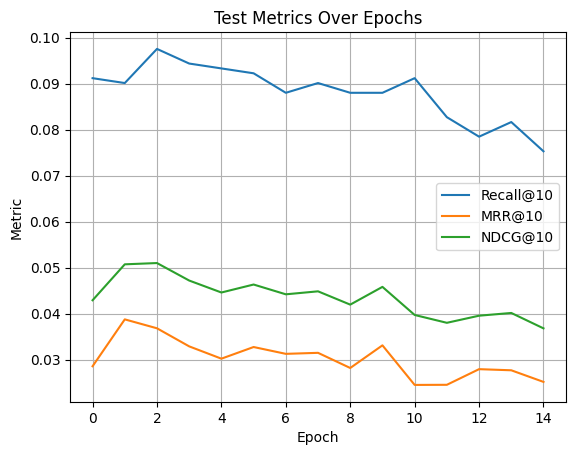


Total run time: 3.96 minutes
[GPU MONITOR] 0% GPU, 1087 MiB

User ID: 3
Input sequence:
  - Item 891: One Fine Day (1996)
  - Item 293: Sabrina (1995)
  - Item 887: Father of the Bride Part II (1995)
  - Item 1149: In Love and War (1996)
  - Item 43: Twister (1996)
  - Item 935: First Kid (1996)
  - Item 1029: Grumpier Old Men (1995)
  - Item 796: Michael (1996)
  - Item 473: First Wives Club, The (1996)
  - Item 364: Mission: Impossible (1996)
  - Item 1040: She's the One (1996)
  - Item 1130: Feeling Minnesota (1996)
  - Item 848: Escape from L.A. (1996)
  - Item 206: All Dogs Go to Heaven 2 (1996)
  - Item 610: Broken Arrow (1996)
  - Item 368: Nutty Professor, The (1996)
  - Item 1022: Fathers' Day (1997)
  - Item 849: Fled (1996)
  - Item 117: Mirror Has Two Faces, The (1996)
  - Item 1273: Selena (1997)
  - Item 931: Chain Reaction (1996)
  - Item 366: Very Brady Sequel, A (1996)
  - Item 1095: High School High (1996)
  - Item 391: Beverly Hills Ninja (1997)
  - Item 862: Bogus 

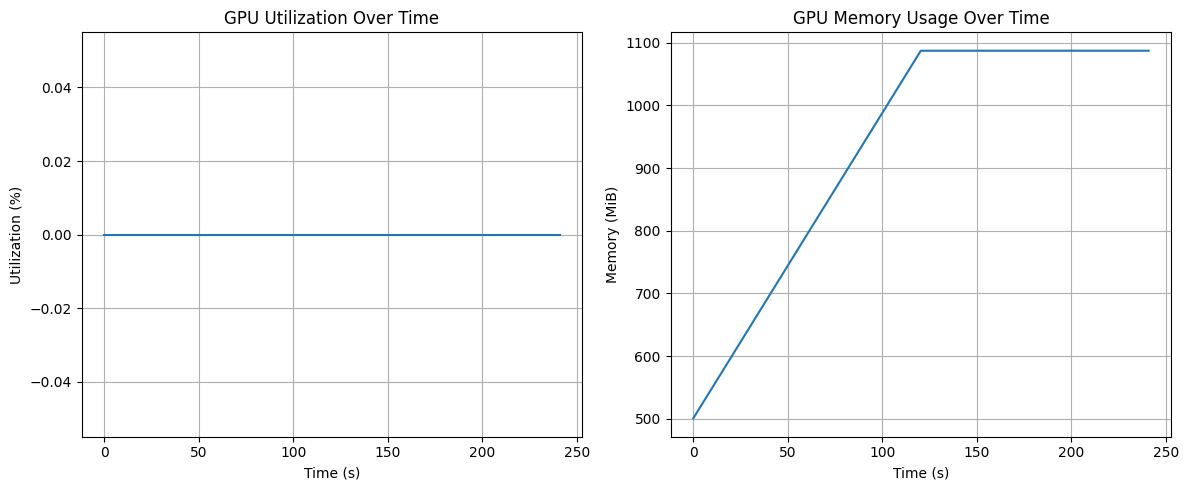


 Loading best model from: best_model_100K.pt 100KxLSTM
Completed


In [7]:
import os
import zipfile
import requests
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import sys
import warnings
import time
warnings.filterwarnings("ignore")

import os
os.environ["TRITON_DEBUG"] = "1"
print("[INFO] Model initialized. Triton should log kernel compilation now.")

# import os
# # Required for Triton to run correctly in Colab
# os.environ["TRITON_DEBUG"] = "1"
os.environ["LD_LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["PATH"] += ":/usr/local/lib"

start_time = time.time()
t_epoch = 15
#10M
MOVIELENS_VERSION = "100K"  # Choose from: "100K", "1M", "10M", "20M"
MODEL_SELECTION = "xLSTM"  # Choose from: "LSTM", "xLSTM", "xLSTMLarge"

import threading
import subprocess
import time

gpu_utilization_log = []
gpu_memory_log = []
gpu_time_log = []


def monitor_gpu(interval=120):
    while True:
        output = subprocess.getoutput(
            "nvidia-smi --query-gpu=utilization.gpu,memory.used --format=csv,noheader,nounits"
        )
        util, mem = map(int, output.strip().split(','))
        gpu_utilization_log.append(util)
        gpu_memory_log.append(mem)
        gpu_time_log.append(time.time() - start_time)
        print(f"[GPU MONITOR] {util}% GPU, {mem} MiB")
        time.sleep(interval)

# Start GPU monitor thread
# monitor_thread = threading.Thread(target=monitor_gpu, daemon=True)
monitor_thread = threading.Thread(target=monitor_gpu, args=(120,), daemon=True)

monitor_thread.start()

train_seqs = {}
val_seqs = {}
test_seqs = {}

step_counter = 1
logged_users = set()
max_print_users = 5
log_lines = []
log_file_path = "training_logs.txt"


# try:
#     import wandb
#     WANDB_AVAILABLE = True
#     wandb.init(project="v8.4_xLSTM_1M", name="v8.4_1M-xLSTM", config={"epochs": 80})
# except ImportError:
#     WANDB_AVAILABLE = False


try:
    import wandb
    WANDB_AVAILABLE = True

    # Dynamically construct project and run name
    project_name = f"xLSTM_MovieLens_{MOVIELENS_VERSION}"
    run_name = f"{MODEL_SELECTION}-{MOVIELENS_VERSION}-{t_epoch}epochs"

    wandb.init(
        project=project_name,
        name=run_name,
        config={
            "epochs": t_epoch,
            "dataset": MOVIELENS_VERSION,
            "model": MODEL_SELECTION
        }
    )
except ImportError:
    WANDB_AVAILABLE = False


sys.path.append("../..")
from xlstm.xlstm_large.model import xLSTMLargeConfig, xLSTMLarge

# -----------------------------
# 1. Select MovieLens Dataset
# -----------------------------

dataset_urls = {
    "100K": "https://files.grouplens.org/datasets/movielens/ml-100k.zip",
    "1M": "https://files.grouplens.org/datasets/movielens/ml-1m.zip",
    "10M": "https://files.grouplens.org/datasets/movielens/ml-10m.zip",
    "20M": "https://files.grouplens.org/datasets/movielens/ml-20m.zip"
}

dataset_dirs = {
    "100K": "ml-100k",
    "1M": "ml-1m",
    "10M": "ml-10M100K",
    "20M": "ml-20m"
}

xlstm_params = {
    "100K": {"embedding_dim": 64, "num_heads": 2, "num_blocks": 1},
    "1M": {"embedding_dim": 96, "num_heads": 2, "num_blocks": 2},
    "10M": {"embedding_dim": 128, "num_heads": 2, "num_blocks": 2},
    "20M": {"embedding_dim": 256, "num_heads": 8, "num_blocks": 4}
}


# dataloader_params = {
#     "100K": {"batch_size": 128, "num_workers": 2},
#     "1M": {"batch_size": 512, "num_workers": 2},
#     "10M": {"batch_size": 1024, "num_workers": 2},
#     "20M": {"batch_size": 1024, "num_workers": 2}
# }

dataloader_params = {
    "100K": {"batch_size": 128, "num_workers": 2},
    "1M": {"batch_size": 256, "num_workers": 2},
    "10M": {"batch_size": 1024, "num_workers": 2},
    "20M": {"batch_size": 1024, "num_workers": 2}
}

DATA_URL = dataset_urls[MOVIELENS_VERSION]
DATA_DIR = dataset_dirs[MOVIELENS_VERSION]

if not os.path.exists(DATA_DIR):
    print(f"Downloading MovieLens {MOVIELENS_VERSION} dataset...")
    r = requests.get(DATA_URL)
    zip_filename = f"{DATA_DIR}.zip"
    with open(zip_filename, "wb") as f:
        f.write(r.content)
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Extraction complete.")

# -----------------------------
# 2. Load and Preprocess Data
# -----------------------------
if MOVIELENS_VERSION == "100K":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "u.data"), sep="\t", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "u.item"), sep='|', encoding='latin-1', header=None, engine='python',
                         names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                                'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                                'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                                'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
    users = pd.read_csv(os.path.join(DATA_DIR, "u.user"), sep='|', header=None,
                        names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

elif MOVIELENS_VERSION == "1M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.dat"), sep="::", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.dat"), sep="::", engine='python',
                         names=['movie_id', 'title', 'genres'], encoding='latin-1')
    users = pd.read_csv(os.path.join(DATA_DIR, "users.dat"), sep="::", engine='python',
                        names=['user_id', 'gender', 'age', 'occupation', 'zip_code'])

elif MOVIELENS_VERSION == "10M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.dat"), sep="::", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.dat"), sep="::", engine='python',
                         names=['movie_id', 'title', 'genres'], encoding='latin-1')
    users = pd.DataFrame({'user_id': rating_df['user_id'].unique()})  # No user metadata

elif MOVIELENS_VERSION == "20M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.csv"))
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.csv"))
    users = pd.DataFrame({'user_id': rating_df['userId'].unique()})  # No user metadata

    rating_df.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'}, inplace=True)
    movies.rename(columns={'movieId': 'movie_id'}, inplace=True)

# -----------------------------
# Map User and Item IDs
# -----------------------------
rating_df.sort_values(by=['user_id', 'timestamp'], inplace=True)
user2id = {uid: i for i, uid in enumerate(rating_df['user_id'].unique())}
item2id = {iid: i for i, iid in enumerate(rating_df['movie_id'].unique())}
rating_df['user_id'] = rating_df['user_id'].map(user2id)
rating_df['movie_id'] = rating_df['movie_id'].map(item2id)

movie_titles = {item2id[row['movie_id']]: row['title'] for _, row in movies.iterrows() if row['movie_id'] in item2id}

if 'user_id' in users.columns:
    users['user_id'] = users['user_id'].map(user2id)
    users.dropna(subset=['user_id'], inplace=True)
    users['user_id'] = users['user_id'].astype(int)

if 'movie_id' in movies.columns:
    movies['movie_id'] = movies['movie_id'].map(item2id)
    movies.dropna(subset=['movie_id'], inplace=True)
    movies['movie_id'] = movies['movie_id'].astype(int)

rating_df = rating_df.merge(users, on='user_id', how='left')
rating_df = rating_df.merge(movies, on='movie_id', how='left')

num_users = len(user2id)
num_items = len(item2id)

print(f"Dataset: {MOVIELENS_VERSION}")
print(f"Length of ratings: {len(rating_df)}")
print(f"Shape: {rating_df.shape}")
print(f"Num users: {num_users}, Num items: {num_items}")

print(f"Length of the ratings: {len(rating_df)}")
print(f"Shape of the ratings dataframe: {rating_df.shape}")
print(rating_df.head())
# print(user2id)
# print(item2id)
# print(num_users)
# print(num_items)
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")

user_interactions = rating_df.groupby('user_id')['movie_id'].count()

# Average sequence length (i.e., avg number of interactions per user)
avg_seq_len = user_interactions.mean()

# Sparsity calculation
total_possible_interactions = num_users * num_items
actual_interactions = len(rating_df)
sparsity = 1.0 - (actual_interactions / total_possible_interactions)

# Print the results
print(f"\n[INFO] Additional Dataset Statistics:")
print(f"Average sequence length: {avg_seq_len:.2f}")
print(f"Sparsity score: {sparsity * 100:.2f}%")

# -----------------------------
# Step 1: Build Feature Dictionaries
# -----------------------------
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# -----------------------------
# Step 2: Construct Sequence Splits
# -----------------------------


MIN_CONTEXT = 5
MAX_LEN = 64

for uid, group in rating_df.groupby('user_id'):
    items = group['movie_id'].tolist()

    if len(items) <= MIN_CONTEXT + 2:
        continue

    # Disjoint splits
    train_items = items[:-2]
    val_item = items[-2]
    test_item = items[-1]

    # Floating training (allowed)
    train_seqs[uid] = train_items

    # Fixed validation: only predict next item once
    val_seqs[uid] = [(train_items, val_item)]

    # Fixed test: only predict the final item
    test_seqs[uid] = [(train_items + [val_item], test_item)]

# -----------------------------
# Step 3: Dataset Classes
# -----------------------------
class TrainDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, items in sequences.items():
            for i in range(1, len(items)):
                seq = items[max(0, i - max_len):i]
                target = items[i]
                self.samples.append((seq, target))
        self.max_len = max_len
        print(f"Train samples: {len(self.samples)}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

class TestDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, pairs in sequences.items():
            for seq, tgt in pairs:
                seq = seq[-max_len:]
                self.samples.append((seq, tgt))
        self.max_len = max_len

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

class EvalDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, pairs in sequences.items():
            for seq, tgt in pairs:
                seq = seq[-max_len:]
                self.samples.append((uid, seq, tgt))
        self.max_len = max_len

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        uid, seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

# -----------------------------
# Inspect train/val/test sequences
# -----------------------------

train_dataset = TrainDataset(train_seqs)

seq, target = train_dataset[0]
print("\n[DEBUG] Input sequence shape:", seq.shape)
print("[DEBUG] Example feature vector at t=0:", seq[0])
print("[DEBUG] Target vector:", target)


print("\n[INFO] Sample from train_seqs:")
for uid in list(train_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    print(f"Train sequence (movie_ids): {train_seqs[uid]}")
    print(f"Sequence length: {len(train_seqs[uid])}")

print("\n[INFO] Sample from val_seqs:")
for uid in list(val_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    print("Validation samples (prefix -> target):")
    for prefix, target in val_seqs[uid][:3]:  # Show first 3 (prefix, target) pairs
        print(f"  {prefix} -> {target}")

print("\n[INFO] Sample from test_seqs:")
for uid in list(test_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    prefix, target = test_seqs[uid][0]  # Only one test pair per user
    print(f"Test prefix: {prefix}")
    print(f"Test target: {target}")


# -----------------------------
# Step 4: DataLoaders
# -----------------------------
# train_loader = DataLoader(TrainDataset(train_seqs), batch_size=256, shuffle=True, num_workers=2)
# val_loader = DataLoader(EvalDataset(val_seqs), batch_size=256)
# test_loader = DataLoader(EvalDataset(test_seqs), batch_size=256)




dl_params = dataloader_params[MOVIELENS_VERSION]

train_loader = DataLoader(
    TrainDataset(train_seqs),
    batch_size=dl_params["batch_size"],
    shuffle=True,
    num_workers=dl_params["num_workers"]
)

val_loader = DataLoader(
    EvalDataset(val_seqs),
    batch_size=dl_params["batch_size"],
    num_workers=dl_params["num_workers"]
)

test_loader = DataLoader(
    EvalDataset(test_seqs),
    batch_size=dl_params["batch_size"],
    num_workers=dl_params["num_workers"]
)



inputs, targets = next(iter(train_loader))

print("[DEBUG] Input batch shape:", inputs.shape)    # (batch_size, max_len, feature_dim)
print("[DEBUG] Target batch shape:", targets.shape)  # (batch_size, feature_dim)

# Optional: print first sample
print("[DEBUG] First input sequence shape:", inputs[0].shape)
print("[DEBUG] First target vector:", targets[0])

# -----------------------------
# 4. Model Setup
# -----------------------------
# xlstm_config = xLSTMLargeConfig(
#     embedding_dim=256,
#     num_heads=4,
#     num_blocks=4,
#     vocab_size=num_items + 1,
#     return_last_states=True,
#     mode="inference",
#     chunkwise_kernel="chunkwise--triton_xl_chunk",
#     sequence_kernel="native_sequence__triton",
#     step_kernel="triton",
# )

if WANDB_AVAILABLE:
    wandb.init(
        project="xLSTM-MovieLens100K",
        name="val-and-lr-scheduler-30epochs",
        notes="1 feature, with val, 2 blocks, 2 heads,100K. Uses validation + LR scheduler. Max_len 50, Embd 128.",

        config={
            "epochs": 30,
            "train_batch_size": 256,
            "val_batch_size": 256,
            "max_len": 50,
            "embedding_dim": 128,
            "num_heads": 2,
            "num_blocks": 2,
            "learning_rate": 0.001,
            "num_users": num_users,
            "num_items": num_items,
            "dataset": "MovieLens-100K",
            "loss_fn": "CrossEntropyLoss"
        }
    )


# if MODEL_SELECTION == "LSTM":
#     class LSTMModel(nn.Module):
#       def __init__(self, num_items, embedding_dim=128, hidden_dim=128, num_layers=1):
#           super().__init__()
#           self.embedding = nn.Embedding(num_items, embedding_dim)
#           self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
#           self.output_layer = nn.Linear(hidden_dim, num_items)

#       def forward(self, x):
#           x = self.embedding(x)
#           out, _ = self.lstm(x)
#           out = out[:, -1, :]
#           logits = self.output_layer(out)
#           return logits
#     model = LSTMModel(num_items=num_items, embedding_dim=128)


# elif MODEL_SELECTION == "xLSTMLarge":
#     xlstm_config = xLSTMLargeConfig(
#         embedding_dim=256,
#         num_heads=4,
#         num_blocks=4,
#         vocab_size=num_items + 1,
#         return_last_states=True,
#         mode="inference",
#         chunkwise_kernel="chunkwise--triton_xl_chunk",
#         sequence_kernel="native_sequence__triton",
#         step_kernel="triton",
#     )
#     model = xLSTMLarge(xlstm_config)

# else:  # xLSTM (default)
#     xlstm_config = xLSTMLargeConfig(
#         embedding_dim=128,
#         num_heads=2,
#         num_blocks=2,
#         vocab_size=num_items + 1,
#         return_last_states=True,
#         mode="inference",
#         chunkwise_kernel="chunkwise--triton_xl_chunk",
#         sequence_kernel="native_sequence__triton",
#         step_kernel="triton",
#     )
#     model = xLSTMLarge(xlstm_config)


params = xlstm_params[MOVIELENS_VERSION]  # dynamically get config

if MODEL_SELECTION == "LSTM":
    class LSTMModel(nn.Module):
        def __init__(self, num_items, embedding_dim=128, hidden_dim=128, num_layers=1):
            super().__init__()
            self.embedding = nn.Embedding(num_items, embedding_dim)
            self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
            self.output_layer = nn.Linear(hidden_dim, num_items)

        def forward(self, x):
            x = self.embedding(x)
            out, _ = self.lstm(x)
            out = out[:, -1, :]
            logits = self.output_layer(out)
            return logits

    model = LSTMModel(
        num_items=num_items,
        embedding_dim=params["embedding_dim"],
        hidden_dim=params["embedding_dim"],  # You can make this separate if desired
        num_layers=1
    )

elif MODEL_SELECTION == "xLSTMLarge":
    xlstm_config = xLSTMLargeConfig(
        embedding_dim=params["embedding_dim"],
        num_heads=params["num_heads"],
        num_blocks=params["num_blocks"],
        vocab_size=num_items + 1,
        return_last_states=True,
        mode="inference",
        chunkwise_kernel="chunkwise--triton_xl_chunk",
        sequence_kernel="native_sequence__triton",
        step_kernel="triton",
    )
    model = xLSTMLarge(xlstm_config)

else:  # xLSTM (default)
    xlstm_config = xLSTMLargeConfig(
        embedding_dim=params["embedding_dim"],
        num_heads=params["num_heads"],
        num_blocks=params["num_blocks"],
        vocab_size=num_items + 1,
        return_last_states=True,
        mode="inference",
        chunkwise_kernel="chunkwise--triton_xl_chunk",
        sequence_kernel="native_sequence__triton",
        step_kernel="triton",
    )
    model = xLSTMLarge(xlstm_config)




# ✅ Compile the model after it's created
# model = torch.compile(model)
# model = torch.compile(model, fullgraph=True, dynamic=False)


# 🚀 Move to GPU (A100 etc.)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 🔧 Set up training components
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
recall_list, mrr_list, ndcg_list = [], [], []

best_recall = 0.0
save_path = f"best_model_{MOVIELENS_VERSION}.pt"

print(f"\nUsing device: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

# -----------------------------
# 5. Metrics
# -----------------------------
#Edit 1:
# def recall_mrr_ndcg_k(preds, targets, k=10):
#     recall, mrr, ndcg = 0.0, 0.0, 0.0
#     for pred, target in zip(preds, targets):
#         if target in pred[:k]:
#             rank = pred[:k].index(target)
#             recall += 1
#             mrr += 1.0 / (rank + 1)
#             ndcg += 1.0 / np.log2(rank + 2)
#     n = len(preds)
#     return recall / n, mrr / n, ndcg / n

#Edit2
def recall_mrr_ndcg_k(preds, targets, k=10):
    recall, mrr, ndcg = 0.0, 0.0, 0.0
    correct_hits = 0  # total number of times target was in top-k
    total_preds = len(preds)

    for pred, target in zip(preds, targets):
        if target in pred[:k]:
            rank = pred[:k].index(target)
            correct_hits += 1
            mrr += 1.0 / (rank + 1)
            ndcg += 1.0 / np.log2(rank + 2)

    recall = correct_hits / total_preds if total_preds > 0 else 0.0
    mrr = mrr / total_preds if total_preds > 0 else 0.0
    ndcg = ndcg / total_preds if total_preds > 0 else 0.0

    return recall, mrr, ndcg, correct_hits, total_preds


# -----------------------------
# 6. Training
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
recall_list, mrr_list, ndcg_list = [], [], []

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

print("\nStarting training...")
for epoch in range(t_epoch):
    model.train()
    total_loss = 0
    for seqs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        seqs, targets = seqs.to(device), targets.to(device)
        optimizer.zero_grad()

        # Edit 1:
        # logits = model(seqs)[0]
        # if logits.dim() == 3:
        #     logits = logits[:, -1, :]
        # loss = criterion(logits, targets)

        #Edit 2:
        # logits = model(seqs)  # output shape: [B, T, V]
        # if logits.dim() == 3:
        #     logits = logits[:, -1, :]  # final time step
        # targets = targets  # shape: [B]
        # # print("logits shape:", logits.shape)
        # # print("targets shape:", targets.shape)
        # loss = criterion(logits, targets)

        logits = model(seqs)
        if isinstance(logits, tuple):
            logits = logits[0]  # extract logits from tuple

        if logits.dim() == 3:
            logits = logits[:, -1, :]  # shape: [B, V]


        # Targets assumed to be shape [B] (index of next item)
        loss = criterion(logits, targets)

        #loss = criterion(logits, targets)

        # Compute predictions
        #top_preds = torch.topk(logits, k=1, dim=-1).indices.squeeze(1)  # shape: [B]

        top_preds = torch.topk(logits, k=1, dim=-1).indices.squeeze(1)
        top_10_preds = torch.topk(logits, k=10, dim=-1).indices  # shape [B, 10]

        # for b in range(seqs.size(0)):
        #     context_seq = seqs[b].tolist()
        #     target_item = targets[b].item()
        #     pred_item = top_preds[b].item()
        #     top_10_items = top_10_preds[b].tolist()
        #     loss_value = nn.functional.cross_entropy(
        #         logits[b].unsqueeze(0), targets[b].unsqueeze(0)
        #     ).item()
        #     status = "Valid" if pred_item == target_item else "InValid"
        #     trimmed_seq = [i for i in context_seq if i > 0]
        #     user_hash = hash(tuple(trimmed_seq))  # simulate UID

        #     # Rank of true target in the full logits
        #     sorted_logits = torch.argsort(logits[b], descending=True)
        #     try:
        #         rank = sorted_logits.tolist().index(target_item) + 1  # 1-based rank
        #     except ValueError:
        #         rank = -1  # should not happen unless target is out of vocab

        #     log_line = (
        #         f"Step = {step_counter}, User: {user_hash}, "
        #         f"Training Seq = {trimmed_seq}, "
        #         f"Target = [{target_item}], Pred = [{pred_item}], "
        #         f"Status = \"{status}\", Loss = [{loss_value:.4f}], "
        #         f"Recall@10 = {top_10_items}, Rank = [{rank}]"
        #     )
        #     log_lines.append(log_line)

        #     if user_hash not in logged_users and len(logged_users) < max_print_users:
        #         print(log_line)
        #         logged_users.add(user_hash)

        #     step_counter += 1

        DEBUG_LOGGING = False  # ✅ set to True only for debugging first few batches

        if DEBUG_LOGGING:
            for b in range(seqs.size(0)):
                context_seq = seqs[b].tolist()
                target_item = targets[b].item()
                pred_item = top_preds[b].item()
                top_10_items = top_10_preds[b].tolist()
                loss_value = nn.functional.cross_entropy(
                    logits[b].unsqueeze(0), targets[b].unsqueeze(0)
                ).item()
                status = "Valid" if pred_item == target_item else "InValid"
                trimmed_seq = [i for i in context_seq if i > 0]
                user_hash = hash(tuple(trimmed_seq))

                sorted_logits = torch.argsort(logits[b], descending=True)
                try:
                    rank = sorted_logits.tolist().index(target_item) + 1
                except ValueError:
                    rank = -1

                log_line = (
                    f"Step = {step_counter}, User: {user_hash}, "
                    f"Training Seq = {trimmed_seq}, "
                    f"Target = [{target_item}], Pred = [{pred_item}], "
                    f"Status = \"{status}\", Loss = [{loss_value:.4f}], "
                    f"Recall@10 = {top_10_items}, Rank = [{rank}]"
                )
                log_lines.append(log_line)

                if user_hash not in logged_users and len(logged_users) < max_print_users:
                    print(log_line)
                    logged_users.add(user_hash)

                step_counter += 1




        loss.backward()
        optimizer.step()
        total_loss += loss.item()


    # Evaluate on test set
    model.eval()
    all_preds, all_targets = [], []

    # with torch.no_grad():
    #     for seqs, targets in test_loader:
    #         seqs = seqs.to(device)
    #         logits = model(seqs)
    #         if isinstance(logits, tuple):
    #             logits = logits[0]
    #         if logits.dim() == 3:
    #             logits = logits[:, -1, :]

    #         topk = torch.topk(logits, k=10, dim=-1).indices.cpu().tolist()  # already a list of lists
    #         all_preds.extend(topk)
    #         all_targets.extend(targets.tolist())

    with torch.no_grad():
        for seqs, targets in test_loader:
            seqs = seqs.to(device)
            logits = model(seqs)
            if isinstance(logits, tuple):
                logits = logits[0]
            if logits.dim() == 3:
                logits = logits[:, -1, :]
            topk = torch.topk(logits, k=10, dim=-1).indices.cpu().tolist()
            all_preds.extend(topk)
            all_targets.extend(targets.tolist())

    # with torch.no_grad():
    #     for seqs, targets in test_loader:  # <- FIXED LINE
    #         seqs = seqs.to(device)
    #         logits = model(seqs)[0]
    #         if logits.dim() == 3:
    #             logits = logits[:, -1, :]
    #         topk = torch.topk(logits, k=10, dim=-1).indices.cpu().tolist()
    #         # all_preds.extend(topk)
    #         all_preds.extend(topk.tolist())
    #         all_targets.extend(targets.tolist())

    recall, mrr, ndcg, correct_hits, total_preds = recall_mrr_ndcg_k(all_preds, all_targets)
    #recall, mrr, ndcg = recall_mrr_ndcg_k(all_preds, all_targets)
    recall_list.append(recall)
    mrr_list.append(mrr)
    ndcg_list.append(ndcg)

    #print(f"Epoch {epoch+1} | Loss: {total_loss:.2f} | Recall@10: {recall:.4f} | MRR@10: {mrr:.4f} | NDCG@10: {ndcg:.4f}")
    print(f"Epoch {epoch+1} | Loss: {total_loss:.2f} | Recall@10: {recall:.4f} "
      f"({correct_hits}/{total_preds}) | MRR@10: {mrr:.4f} | NDCG@10: {ndcg:.4f}")

    # if recall > best_recall:
    #     best_recall = recall
    #     torch.save(model.state_dict(), save_path)
    #     print(f" Saved new best model (Recall@10 = {recall:.4f}) to {save_path}")

    patience = 3
    epochs_no_improve = 0

    if recall > best_recall:
        best_recall = recall
        torch.save(model.state_dict(), save_path)
        print(f"Saved new best model (Recall@10 = {recall:.4f}) to {save_path}")
        epochs_no_improve = 0  # reset on improvement
    else:
        epochs_no_improve += 1
        print(f" No improvement for {epochs_no_improve} epoch(s)")

    if epochs_no_improve >= patience:
        print(f"\n Early stopping triggered. No improvement for {patience} consecutive epochs.")
        break

    if WANDB_AVAILABLE:
        wandb.log({"loss": total_loss, "recall@10": recall, "mrr@10": mrr, "ndcg@10": ndcg})


print(f"\n Loading best model from: {save_path}")
model.load_state_dict(torch.load(save_path, map_location=device))
model.to(device)
model.eval()
# -----------------------------
# 7. Plot
# -----------------------------
plt.figure()
plt.plot(recall_list, label='Recall@10')
plt.plot(mrr_list, label='MRR@10')
plt.plot(ndcg_list, label='NDCG@10')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Test Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

elapsed_minutes = (time.time() - start_time) / 60
print(f"\nTotal run time: {elapsed_minutes:.2f} minutes")

# -----------------------------
# 8. Sample Predictions
# -----------------------------
sample_dataset = EvalDataset(test_seqs, max_len=MAX_LEN)
sample_loader = DataLoader(sample_dataset, batch_size=1, shuffle=True)

with torch.no_grad():
    for i, (seq_tensor, target_tensor) in enumerate(sample_loader):
        # uid = uid_tensor.item()
        input_seq = seq_tensor.to(device)
        target = target_tensor.item()

        logits = model(input_seq)[0]
        if logits.dim() == 3:
            logits = logits[:, -1, :]

        probs = torch.softmax(logits, dim=-1)
        topk_logits = torch.topk(logits, k=10, dim=-1)
        topk_probs = torch.topk(probs, k=10, dim=-1)

        topk_items = topk_probs.indices.squeeze().tolist()
        topk_scores = topk_probs.values.squeeze().tolist()
        topk_raw_logits = topk_logits.values.squeeze().tolist()

        input_ids = seq_tensor.squeeze().tolist()
        print(f"\nUser ID: {uid}")
        print("Input sequence:")
        for m in input_ids:
            if m > 0:
                print(f"  - Item {m}: {movie_titles.get(m, 'Unknown')}")

        true_movie = movie_titles.get(target, f"Item {target}")
        # true_prob = probs[0, target].item()
        # true_logit = logits[0, target].item()
        true_prob = probs.view(-1)[target].item()
        true_logit = logits.view(-1)[target].item()

        print(f"True next item: Item {target}: {true_movie} (logit: {true_logit:.4f}, confidence: {true_prob:.4f})")

        print("Top-10 Predictions with scores:")
        for rank, (item, logit_score, prob_score) in enumerate(zip(topk_items, topk_raw_logits, topk_scores), start=1):
            movie_name = movie_titles.get(item, f"Item {item}")
            print(f"  {rank}. Item {item}: {movie_name} (logit: {logit_score:.4f}, confidence: {prob_score:.4f})")

        if i == 4:
            break

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(gpu_time_log, gpu_utilization_log)
plt.title("GPU Utilization Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Utilization (%)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(gpu_time_log, gpu_memory_log)
plt.title("GPU Memory Usage Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Memory (MiB)")
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\n Loading best model from: {save_path} {MOVIELENS_VERSION}{MODEL_SELECTION}")
print("Completed")

[INFO] Model initialized. Triton should log kernel compilation now.


[GPU MONITOR] 0% GPU, 1441 MiB


loss,█▆▅▅▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁
mrr@10,▁▃▄▃▄▅▅▆▇▆▇▆▇█▇▇██▇█
ndcg@10,▁▃▄▄▄▅▆▆▇▇▇▇▇█▇▇████
recall@10,▁▂▃▄▄▅▆▆▇▆▇▇▇▇▇▇▇▇█▇
loss,40723.80639
mrr@10,0.09601
ndcg@10,0.12438
recall@10,0.21755


Dataset: 1M
Length of ratings: 1000209
Shape: (1000209, 10)
Num users: 6040, Num items: 3706
Length of the ratings: 1000209
Shape of the ratings dataframe: (1000209, 10)
   user_id  movie_id  rating  timestamp gender  age  occupation zip_code  \
0        0         0       4  978300019      F    1          10    48067   
1        0         1       5  978300055      F    1          10    48067   
2        0         2       4  978300055      F    1          10    48067   
3        0         3       5  978300055      F    1          10    48067   
4        0         4       3  978300103      F    1          10    48067   

                       title                        genres  
0   Girl, Interrupted (1999)                         Drama  
1  Back to the Future (1985)                 Comedy|Sci-Fi  
2             Titanic (1997)                 Drama|Romance  
3          Cinderella (1950)  Animation|Children's|Musical  
4      Meet Joe Black (1998)                       Romance  
Number 


Using device: cuda
GPU: NVIDIA A100-SXM4-40GB
Memory: 42.47 GB
Wed Jun  4 19:23:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             49W /  400W |    1441MiB /  40960MiB |      0%      Default |
|                                         |                        |        

Epoch 1:  21%|██        | 1616/7673 [00:19<01:13, 82.11it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 1:  23%|██▎       | 1742/7673 [00:20<01:13, 81.13it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 1:  69%|██████▊   | 5259/7673 [01:03<00:29, 83.03it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 1: 100%|██████████| 7673/7673 [01:32<00:00, 83.06it/s]


Epoch 1 | Loss: 52486.28 | Recall@10: 0.1445 (873/6040) | MRR@10: 0.0630 | NDCG@10: 0.0821
Saved new best model (Recall@10 = 0.1445) to best_model_1M.pt


Epoch 2:  13%|█▎        | 966/7673 [00:11<01:20, 83.03it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 2:  51%|█████     | 3899/7673 [00:46<00:45, 82.66it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 2:  52%|█████▏    | 4025/7673 [00:48<00:44, 82.59it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 2:  98%|█████████▊| 7544/7673 [01:30<00:01, 83.53it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 2: 100%|██████████| 7673/7673 [01:32<00:00, 83.24it/s]


Epoch 2 | Loss: 49232.26 | Recall@10: 0.1657 (1001/6040) | MRR@10: 0.0720 | NDCG@10: 0.0938
Saved new best model (Recall@10 = 0.1657) to best_model_1M.pt


Epoch 3:  43%|████▎     | 3272/7673 [00:39<00:53, 82.78it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 3:  81%|████████  | 6206/7673 [01:14<00:18, 80.53it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 3:  83%|████████▎ | 6332/7673 [01:15<00:15, 83.82it/s]

[GPU MONITOR] 41% GPU, 1441 MiB


Epoch 3: 100%|██████████| 7673/7673 [01:31<00:00, 83.45it/s]


Epoch 3 | Loss: 48485.48 | Recall@10: 0.1690 (1021/6040) | MRR@10: 0.0758 | NDCG@10: 0.0975
Saved new best model (Recall@10 = 0.1690) to best_model_1M.pt


Epoch 4:  28%|██▊       | 2146/7673 [00:25<01:07, 81.95it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 4:  73%|███████▎  | 5566/7673 [01:06<00:25, 82.00it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 4: 100%|██████████| 7673/7673 [01:32<00:00, 83.00it/s]


Epoch 4 | Loss: 47897.44 | Recall@10: 0.1705 (1030/6040) | MRR@10: 0.0766 | NDCG@10: 0.0986
Saved new best model (Recall@10 = 0.1705) to best_model_1M.pt


Epoch 5:  10%|█         | 770/7673 [00:09<01:24, 81.44it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 5:  12%|█▏        | 896/7673 [00:10<01:22, 82.58it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 5:  58%|█████▊    | 4423/7673 [00:53<00:38, 84.51it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 5: 100%|██████████| 7673/7673 [01:32<00:00, 83.25it/s]


Epoch 5 | Loss: 46951.40 | Recall@10: 0.1810 (1093/6040) | MRR@10: 0.0767 | NDCG@10: 0.1010
Saved new best model (Recall@10 = 0.1810) to best_model_1M.pt


Epoch 6:   2%|▏         | 139/7673 [00:01<01:31, 82.67it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 6:  40%|████      | 3073/7673 [00:36<00:55, 82.16it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 6:  42%|████▏     | 3199/7673 [00:38<00:54, 82.79it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 6:  88%|████████▊ | 6718/7673 [01:20<00:11, 83.14it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 6: 100%|██████████| 7673/7673 [01:32<00:00, 83.32it/s]


Epoch 6 | Loss: 45809.01 | Recall@10: 0.1833 (1107/6040) | MRR@10: 0.0803 | NDCG@10: 0.1043
Saved new best model (Recall@10 = 0.1833) to best_model_1M.pt


Epoch 7:  32%|███▏      | 2451/7673 [00:29<01:03, 82.65it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 7:  70%|███████   | 5375/7673 [01:04<00:27, 83.60it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 7:  72%|███████▏  | 5501/7673 [01:06<00:26, 81.87it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 7: 100%|██████████| 7673/7673 [01:32<00:00, 83.21it/s]


Epoch 7 | Loss: 44895.73 | Recall@10: 0.1849 (1117/6040) | MRR@10: 0.0821 | NDCG@10: 0.1062
Saved new best model (Recall@10 = 0.1849) to best_model_1M.pt


Epoch 8:  17%|█▋        | 1291/7673 [00:15<01:18, 81.43it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 8:  61%|██████▏   | 4710/7673 [00:56<00:36, 81.12it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 8:  99%|█████████▉| 7625/7673 [01:31<00:00, 81.21it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 8: 100%|██████████| 7673/7673 [01:32<00:00, 82.86it/s]


Epoch 8 | Loss: 44170.61 | Recall@10: 0.1907 (1152/6040) | MRR@10: 0.0857 | NDCG@10: 0.1102
Saved new best model (Recall@10 = 0.1907) to best_model_1M.pt


Epoch 9:   1%|          | 48/7673 [00:00<01:36, 79.20it/s]

[GPU MONITOR] 41% GPU, 1441 MiB


Epoch 9:  46%|████▌     | 3541/7673 [00:42<00:49, 83.44it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 9:  91%|█████████ | 6949/7673 [01:23<00:08, 83.06it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 9: 100%|██████████| 7673/7673 [01:32<00:00, 82.70it/s]


Epoch 9 | Loss: 43596.73 | Recall@10: 0.1995 (1205/6040) | MRR@10: 0.0880 | NDCG@10: 0.1141
Saved new best model (Recall@10 = 0.1995) to best_model_1M.pt


Epoch 10:  28%|██▊       | 2154/7673 [00:25<01:07, 81.49it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 10:  30%|██▉       | 2280/7673 [00:27<01:07, 80.39it/s]

[GPU MONITOR] 35% GPU, 1441 MiB


Epoch 10:  76%|███████▌  | 5794/7673 [01:09<00:22, 84.81it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 10: 100%|██████████| 7673/7673 [01:32<00:00, 83.00it/s]


Epoch 10 | Loss: 43151.73 | Recall@10: 0.2000 (1208/6040) | MRR@10: 0.0890 | NDCG@10: 0.1150
Saved new best model (Recall@10 = 0.2000) to best_model_1M.pt


Epoch 11:  20%|█▉        | 1507/7673 [00:18<01:15, 82.00it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 11:  58%|█████▊    | 4431/7673 [00:53<00:39, 81.86it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 11:  59%|█████▉    | 4557/7673 [00:54<00:37, 82.71it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 11: 100%|██████████| 7673/7673 [01:32<00:00, 83.36it/s]


Epoch 11 | Loss: 42790.35 | Recall@10: 0.2033 (1228/6040) | MRR@10: 0.0883 | NDCG@10: 0.1152
Saved new best model (Recall@10 = 0.2033) to best_model_1M.pt


Epoch 12:   5%|▍         | 383/7673 [00:04<01:27, 83.23it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 12:  50%|████▉     | 3821/7673 [00:45<00:47, 81.79it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 12:  88%|████████▊ | 6745/7673 [01:20<00:11, 83.08it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 12:  90%|████████▉ | 6871/7673 [01:22<00:09, 82.48it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 12: 100%|██████████| 7673/7673 [01:32<00:00, 83.27it/s]


Epoch 12 | Loss: 42487.47 | Recall@10: 0.2070 (1250/6040) | MRR@10: 0.0889 | NDCG@10: 0.1164
Saved new best model (Recall@10 = 0.2070) to best_model_1M.pt


Epoch 13:  35%|███▍      | 2655/7673 [00:32<01:01, 81.14it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 13:  79%|███████▊  | 6035/7673 [01:13<00:21, 76.58it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 13: 100%|██████████| 7673/7673 [01:33<00:00, 82.19it/s]


Epoch 13 | Loss: 42235.30 | Recall@10: 0.2124 (1283/6040) | MRR@10: 0.0921 | NDCG@10: 0.1202
Saved new best model (Recall@10 = 0.2124) to best_model_1M.pt


Epoch 14:  16%|█▌        | 1228/7673 [00:14<01:17, 83.39it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 14:  18%|█▊        | 1354/7673 [00:16<01:16, 82.28it/s]

[GPU MONITOR] 37% GPU, 1441 MiB


Epoch 14:  64%|██████▎   | 4882/7673 [00:58<00:33, 83.32it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 14: 100%|██████████| 7673/7673 [01:32<00:00, 83.39it/s]


Epoch 14 | Loss: 42018.90 | Recall@10: 0.2136 (1290/6040) | MRR@10: 0.0934 | NDCG@10: 0.1215
Saved new best model (Recall@10 = 0.2136) to best_model_1M.pt


Epoch 15:   8%|▊         | 608/7673 [00:07<01:26, 82.01it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 15:  46%|████▌     | 3542/7673 [00:42<00:49, 83.17it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 15:  48%|████▊     | 3677/7673 [00:44<00:49, 81.54it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 15:  94%|█████████▍| 7196/7673 [01:26<00:05, 84.54it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 15: 100%|██████████| 7673/7673 [01:32<00:00, 83.40it/s]


Epoch 15 | Loss: 41828.78 | Recall@10: 0.2144 (1295/6040) | MRR@10: 0.0928 | NDCG@10: 0.1212
Saved new best model (Recall@10 = 0.2144) to best_model_1M.pt


Epoch 16:  38%|███▊      | 2880/7673 [00:35<01:00, 78.83it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 16:  74%|███████▍  | 5699/7673 [01:10<00:23, 83.13it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 16:  76%|███████▌  | 5825/7673 [01:11<00:23, 80.25it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 16: 100%|██████████| 7673/7673 [01:33<00:00, 81.78it/s]


Epoch 16 | Loss: 41661.88 | Recall@10: 0.2152 (1300/6040) | MRR@10: 0.0946 | NDCG@10: 0.1228
Saved new best model (Recall@10 = 0.2152) to best_model_1M.pt


Epoch 17:  20%|█▉        | 1532/7673 [00:18<01:13, 83.52it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 17:  64%|██████▍   | 4905/7673 [00:59<00:36, 76.39it/s]

[GPU MONITOR] 37% GPU, 1441 MiB


Epoch 17: 100%|██████████| 7673/7673 [01:33<00:00, 81.69it/s]


Epoch 17 | Loss: 41507.57 | Recall@10: 0.2108 (1273/6040) | MRR@10: 0.0934 | NDCG@10: 0.1209
 No improvement for 1 epoch(s)


Epoch 18:   1%|          | 50/7673 [00:00<01:34, 80.71it/s]

[GPU MONITOR] 43% GPU, 1441 MiB


Epoch 18:   2%|▏         | 176/7673 [00:02<01:32, 81.35it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 18:  48%|████▊     | 3649/7673 [00:44<00:49, 81.20it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 18:  91%|█████████▏| 7015/7673 [01:25<00:07, 82.97it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 18: 100%|██████████| 7673/7673 [01:34<00:00, 81.53it/s]


Epoch 18 | Loss: 41372.79 | Recall@10: 0.2220 (1341/6040) | MRR@10: 0.0966 | NDCG@10: 0.1259
Saved new best model (Recall@10 = 0.2220) to best_model_1M.pt


Epoch 19:  28%|██▊       | 2132/7673 [00:26<01:07, 82.03it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 19:  29%|██▉       | 2258/7673 [00:27<01:06, 80.88it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 19:  75%|███████▍  | 5722/7673 [01:09<00:23, 83.12it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 19: 100%|██████████| 7673/7673 [01:33<00:00, 81.83it/s]


Epoch 19 | Loss: 41247.84 | Recall@10: 0.2182 (1318/6040) | MRR@10: 0.0960 | NDCG@10: 0.1246
 No improvement for 1 epoch(s)


Epoch 20:  18%|█▊        | 1399/7673 [00:17<01:16, 81.92it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 20:  56%|█████▌    | 4301/7673 [00:52<00:41, 81.14it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 20:  58%|█████▊    | 4424/7673 [00:53<00:40, 80.62it/s]

[GPU MONITOR] 37% GPU, 1441 MiB


Epoch 20: 100%|██████████| 7673/7673 [01:33<00:00, 82.30it/s]


Epoch 20 | Loss: 41134.74 | Recall@10: 0.2116 (1278/6040) | MRR@10: 0.0932 | NDCG@10: 0.1210
 No improvement for 1 epoch(s)


Epoch 21:   3%|▎         | 194/7673 [00:02<01:30, 82.95it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 21:  47%|████▋     | 3600/7673 [00:43<00:48, 83.60it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 21:  85%|████████▍ | 6491/7673 [01:18<00:14, 81.39it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 21:  86%|████████▌ | 6617/7673 [01:20<00:12, 82.35it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 21: 100%|██████████| 7673/7673 [01:33<00:00, 82.30it/s]


Epoch 21 | Loss: 41027.55 | Recall@10: 0.2144 (1295/6040) | MRR@10: 0.0926 | NDCG@10: 0.1211
 No improvement for 1 epoch(s)


Epoch 22:  31%|███       | 2361/7673 [00:28<01:04, 81.98it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 22:  75%|███████▍  | 5744/7673 [01:10<00:22, 84.00it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 22: 100%|██████████| 7673/7673 [01:33<00:00, 82.18it/s]


Epoch 22 | Loss: 40934.57 | Recall@10: 0.2157 (1303/6040) | MRR@10: 0.0962 | NDCG@10: 0.1242
 No improvement for 1 epoch(s)


Epoch 23:  12%|█▏        | 939/7673 [00:11<01:21, 82.59it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 23:  14%|█▍        | 1065/7673 [00:12<01:21, 81.52it/s]

[GPU MONITOR] 37% GPU, 1441 MiB


Epoch 23:  59%|█████▉    | 4556/7673 [00:55<00:37, 83.65it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 23: 100%|██████████| 7673/7673 [01:32<00:00, 82.52it/s]


Epoch 23 | Loss: 40846.21 | Recall@10: 0.2137 (1291/6040) | MRR@10: 0.0948 | NDCG@10: 0.1227
 No improvement for 1 epoch(s)


Epoch 24:   3%|▎         | 248/7673 [00:03<01:30, 81.62it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 24:  41%|████      | 3151/7673 [00:38<00:54, 82.64it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 24:  43%|████▎     | 3277/7673 [00:39<00:52, 82.95it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 24:  88%|████████▊ | 6754/7673 [01:21<00:11, 82.89it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 24: 100%|██████████| 7673/7673 [01:33<00:00, 82.36it/s]


Epoch 24 | Loss: 40761.41 | Recall@10: 0.2164 (1307/6040) | MRR@10: 0.0986 | NDCG@10: 0.1261
 No improvement for 1 epoch(s)


Epoch 25:  32%|███▏      | 2421/7673 [00:29<01:04, 81.94it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 25:  69%|██████▉   | 5306/7673 [01:04<00:28, 82.14it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 25:  71%|███████   | 5432/7673 [01:06<00:27, 82.46it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 25: 100%|██████████| 7673/7673 [01:33<00:00, 81.77it/s]


Epoch 25 | Loss: 40684.14 | Recall@10: 0.2177 (1315/6040) | MRR@10: 0.0965 | NDCG@10: 0.1249
 No improvement for 1 epoch(s)


Epoch 26:  15%|█▌        | 1163/7673 [00:14<01:19, 81.78it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 26:  59%|█████▉    | 4539/7673 [00:55<00:39, 79.93it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 26:  97%|█████████▋| 7417/7673 [01:30<00:03, 82.04it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 26:  98%|█████████▊| 7543/7673 [01:32<00:01, 82.53it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 26: 100%|██████████| 7673/7673 [01:33<00:00, 81.79it/s]


Epoch 26 | Loss: 40611.20 | Recall@10: 0.2190 (1323/6040) | MRR@10: 0.0954 | NDCG@10: 0.1243
 No improvement for 1 epoch(s)


Epoch 27:  43%|████▎     | 3275/7673 [00:40<00:53, 82.67it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 27:  87%|████████▋ | 6652/7673 [01:21<00:12, 81.78it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 27: 100%|██████████| 7673/7673 [01:33<00:00, 81.65it/s]


Epoch 27 | Loss: 40540.40 | Recall@10: 0.2177 (1315/6040) | MRR@10: 0.0964 | NDCG@10: 0.1248
 No improvement for 1 epoch(s)


Epoch 28:  24%|██▎       | 1812/7673 [00:22<01:13, 79.46it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 28:  25%|██▌       | 1938/7673 [00:23<01:10, 81.88it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 28:  70%|██████▉   | 5357/7673 [01:05<00:27, 83.04it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 28: 100%|██████████| 7673/7673 [01:34<00:00, 81.54it/s]


Epoch 28 | Loss: 40473.73 | Recall@10: 0.2185 (1320/6040) | MRR@10: 0.0935 | NDCG@10: 0.1227
 No improvement for 1 epoch(s)


Epoch 29:  13%|█▎        | 1033/7673 [00:12<01:21, 81.29it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 29:  51%|█████     | 3907/7673 [00:47<00:45, 82.16it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 29:  53%|█████▎    | 4033/7673 [00:49<00:44, 82.64it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 29:  98%|█████████▊| 7534/7673 [01:31<00:01, 81.68it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 29: 100%|██████████| 7673/7673 [01:33<00:00, 82.32it/s]


Epoch 29 | Loss: 40410.89 | Recall@10: 0.2144 (1295/6040) | MRR@10: 0.0924 | NDCG@10: 0.1209
 No improvement for 1 epoch(s)


Epoch 30:  41%|████      | 3141/7673 [00:39<00:56, 80.59it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 30:  79%|███████▉  | 6065/7673 [01:14<00:19, 83.47it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 30:  81%|████████  | 6191/7673 [01:15<00:17, 82.53it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 30: 100%|██████████| 7673/7673 [01:33<00:00, 81.71it/s]


Epoch 30 | Loss: 40352.54 | Recall@10: 0.2220 (1341/6040) | MRR@10: 0.0985 | NDCG@10: 0.1273
 No improvement for 1 epoch(s)


Epoch 31:  25%|██▌       | 1939/7673 [00:23<01:12, 78.98it/s]

[GPU MONITOR] 37% GPU, 1441 MiB


Epoch 31:  70%|██████▉   | 5336/7673 [01:05<00:28, 82.54it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 31: 100%|██████████| 7673/7673 [01:33<00:00, 82.12it/s]


Epoch 31 | Loss: 40291.23 | Recall@10: 0.2179 (1316/6040) | MRR@10: 0.0961 | NDCG@10: 0.1246
 No improvement for 1 epoch(s)


Epoch 32:   7%|▋         | 519/7673 [00:06<01:26, 82.86it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 32:   8%|▊         | 645/7673 [00:07<01:24, 83.32it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 32:  53%|█████▎    | 4092/7673 [00:50<00:44, 80.78it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 32:  98%|█████████▊| 7520/7673 [01:31<00:01, 82.18it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 32: 100%|██████████| 7673/7673 [01:33<00:00, 82.39it/s]


Epoch 32 | Loss: 40239.72 | Recall@10: 0.2164 (1307/6040) | MRR@10: 0.0958 | NDCG@10: 0.1240
 No improvement for 1 epoch(s)


Epoch 33:  36%|███▌      | 2731/7673 [00:32<00:59, 82.47it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 33:  37%|███▋      | 2857/7673 [00:34<00:58, 82.53it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 33:  82%|████████▏ | 6264/7673 [01:16<00:17, 81.67it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 33: 100%|██████████| 7673/7673 [01:33<00:00, 81.85it/s]


Epoch 33 | Loss: 40185.72 | Recall@10: 0.2179 (1316/6040) | MRR@10: 0.0967 | NDCG@10: 0.1250
 No improvement for 1 epoch(s)


Epoch 34:  25%|██▌       | 1953/7673 [00:23<01:08, 83.08it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 34:  62%|██████▏   | 4795/7673 [00:58<00:34, 82.40it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 34:  64%|██████▍   | 4919/7673 [01:00<00:34, 80.18it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 34: 100%|██████████| 7673/7673 [01:34<00:00, 81.37it/s]


Epoch 34 | Loss: 40138.38 | Recall@10: 0.2167 (1309/6040) | MRR@10: 0.0961 | NDCG@10: 0.1244
 No improvement for 1 epoch(s)


Epoch 35:   8%|▊         | 641/7673 [00:07<01:29, 78.36it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 35:  52%|█████▏    | 4024/7673 [00:49<00:45, 79.97it/s]

[GPU MONITOR] 38% GPU, 1441 MiB


Epoch 35:  90%|████████▉ | 6901/7673 [01:24<00:09, 83.04it/s]

[GPU MONITOR] 40% GPU, 1441 MiB


Epoch 35:  92%|█████████▏| 7027/7673 [01:25<00:07, 80.78it/s]

[GPU MONITOR] 39% GPU, 1441 MiB


Epoch 35: 100%|██████████| 7673/7673 [01:33<00:00, 81.73it/s]


Epoch 35 | Loss: 40089.20 | Recall@10: 0.2171 (1311/6040) | MRR@10: 0.0977 | NDCG@10: 0.1256
 No improvement for 1 epoch(s)

 Loading best model from: best_model_1M.pt


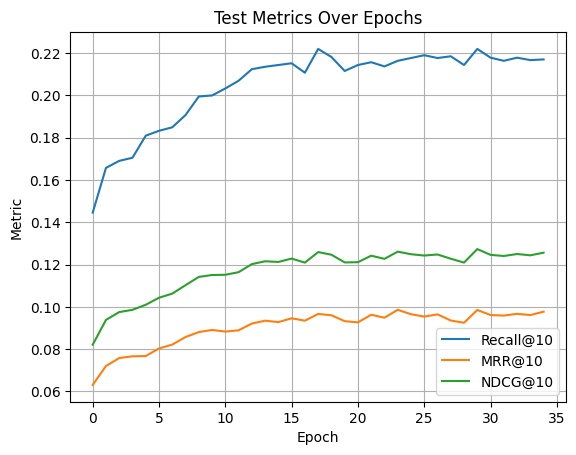


Total run time: 54.77 minutes

User ID: 3
Input sequence:
  - Item 2213: Get Carter (2000)
  - Item 1163: Apostle, The (1997)
  - Item 456: Postino, Il (The Postman) (1994)
  - Item 1226: Some Folks Call It a Sling Blade (1993)
  - Item 278: Good Will Hunting (1997)
  - Item 137: Thelma & Louise (1991)
  - Item 449: American History X (1998)
  - Item 889: Selena (1997)
  - Item 452: Red Violin, The (Le Violon rouge) (1998)
  - Item 378: Nightmare Before Christmas, The (1993)
  - Item 897: Game, The (1997)
  - Item 35: Pleasantville (1998)
  - Item 479: Adventures of Priscilla, Queen of the Desert, The (1994)
  - Item 409: Lion King, The (1994)
  - Item 739: Galaxy Quest (1999)
  - Item 359: Metropolitan (1990)
  - Item 899: Singles (1992)
  - Item 468: Rudy (1993)
  - Item 112: Few Good Men, A (1992)
  - Item 205: Happy Gilmore (1996)
  - Item 1467: Brothers McMullen, The (1995)
  - Item 652: That Thing You Do! (1996)
  - Item 478: Cop Land (1997)
  - Item 464: Crimson Tide (1995)
  -

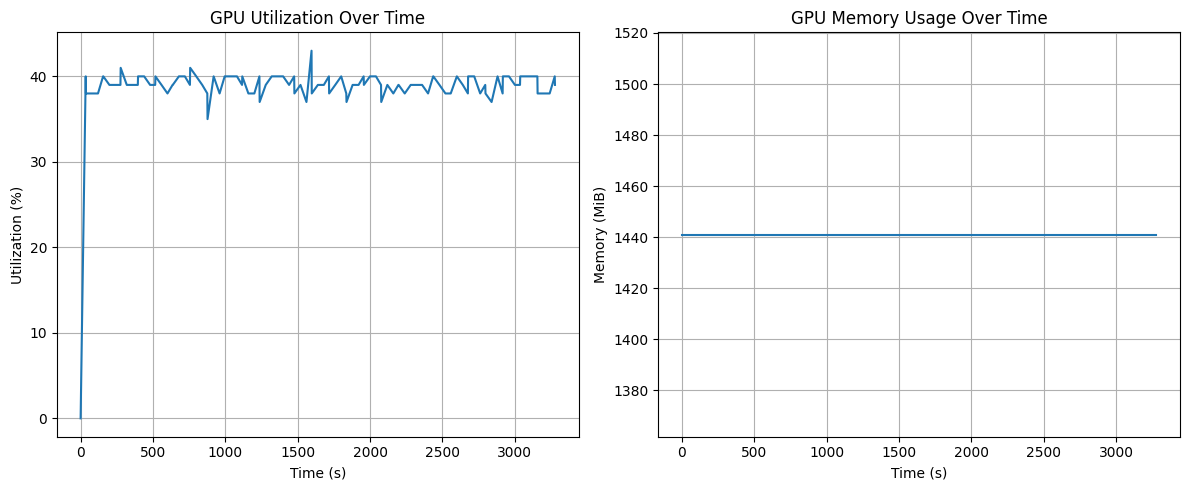


 Loading best model from: best_model_1M.pt 1MxLSTM
Completed


In [10]:
import os
import zipfile
import requests
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import sys
import warnings
import time
warnings.filterwarnings("ignore")

import os
os.environ["TRITON_DEBUG"] = "1"
print("[INFO] Model initialized. Triton should log kernel compilation now.")

# import os
# # Required for Triton to run correctly in Colab
# os.environ["TRITON_DEBUG"] = "1"
os.environ["LD_LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["PATH"] += ":/usr/local/lib"

start_time = time.time()
t_epoch = 35
#10M
MOVIELENS_VERSION = "1M"  # Choose from: "100K", "1M", "10M", "20M"
MODEL_SELECTION = "xLSTM"  # Choose from: "LSTM", "xLSTM", "xLSTMLarge"

import threading
import subprocess
import time

gpu_utilization_log = []
gpu_memory_log = []
gpu_time_log = []


def monitor_gpu(interval=120):
    while True:
        output = subprocess.getoutput(
            "nvidia-smi --query-gpu=utilization.gpu,memory.used --format=csv,noheader,nounits"
        )
        util, mem = map(int, output.strip().split(','))
        gpu_utilization_log.append(util)
        gpu_memory_log.append(mem)
        gpu_time_log.append(time.time() - start_time)
        print(f"[GPU MONITOR] {util}% GPU, {mem} MiB")
        time.sleep(interval)

# Start GPU monitor thread
# monitor_thread = threading.Thread(target=monitor_gpu, daemon=True)
monitor_thread = threading.Thread(target=monitor_gpu, args=(120,), daemon=True)

monitor_thread.start()

train_seqs = {}
val_seqs = {}
test_seqs = {}

step_counter = 1
logged_users = set()
max_print_users = 5
log_lines = []
log_file_path = "training_logs.txt"


# try:
#     import wandb
#     WANDB_AVAILABLE = True
#     wandb.init(project="v8.4_xLSTM_1M", name="v8.4_1M-xLSTM", config={"epochs": 80})
# except ImportError:
#     WANDB_AVAILABLE = False


try:
    import wandb
    WANDB_AVAILABLE = True

    # Dynamically construct project and run name
    project_name = f"xLSTM_MovieLens_{MOVIELENS_VERSION}"
    run_name = f"{MODEL_SELECTION}-{MOVIELENS_VERSION}-{t_epoch}epochs"

    wandb.init(
        project=project_name,
        name=run_name,
        config={
            "epochs": t_epoch,
            "dataset": MOVIELENS_VERSION,
            "model": MODEL_SELECTION
        }
    )
except ImportError:
    WANDB_AVAILABLE = False


sys.path.append("../..")
from xlstm.xlstm_large.model import xLSTMLargeConfig, xLSTMLarge

# -----------------------------
# 1. Select MovieLens Dataset
# -----------------------------

dataset_urls = {
    "100K": "https://files.grouplens.org/datasets/movielens/ml-100k.zip",
    "1M": "https://files.grouplens.org/datasets/movielens/ml-1m.zip",
    "10M": "https://files.grouplens.org/datasets/movielens/ml-10m.zip",
    "20M": "https://files.grouplens.org/datasets/movielens/ml-20m.zip"
}

dataset_dirs = {
    "100K": "ml-100k",
    "1M": "ml-1m",
    "10M": "ml-10M100K",
    "20M": "ml-20m"
}

xlstm_params = {
    "100K": {"embedding_dim": 64, "num_heads": 2, "num_blocks": 1},
    "1M": {"embedding_dim": 64, "num_heads": 2, "num_blocks": 1},
    "10M": {"embedding_dim": 128, "num_heads": 2, "num_blocks": 2},
    "20M": {"embedding_dim": 256, "num_heads": 8, "num_blocks": 4}
}

# xlstm_params = {
#     "100K": {"embedding_dim": 64, "num_heads": 2, "num_blocks": 1},
#     "1M": {"embedding_dim": 96, "num_heads": 2, "num_blocks": 2},
#     "10M": {"embedding_dim": 128, "num_heads": 2, "num_blocks": 2},
#     "20M": {"embedding_dim": 256, "num_heads": 8, "num_blocks": 4}
# }


# dataloader_params = {
#     "100K": {"batch_size": 128, "num_workers": 2},
#     "1M": {"batch_size": 512, "num_workers": 2},
#     "10M": {"batch_size": 1024, "num_workers": 2},
#     "20M": {"batch_size": 1024, "num_workers": 2}
# }

dataloader_params = {
    "100K": {"batch_size": 128, "num_workers": 2},
    "1M": {"batch_size": 128, "num_workers": 0},
    "10M": {"batch_size": 1024, "num_workers": 2},
    "20M": {"batch_size": 1024, "num_workers": 2}
}

DATA_URL = dataset_urls[MOVIELENS_VERSION]
DATA_DIR = dataset_dirs[MOVIELENS_VERSION]

if not os.path.exists(DATA_DIR):
    print(f"Downloading MovieLens {MOVIELENS_VERSION} dataset...")
    r = requests.get(DATA_URL)
    zip_filename = f"{DATA_DIR}.zip"
    with open(zip_filename, "wb") as f:
        f.write(r.content)
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Extraction complete.")

# -----------------------------
# 2. Load and Preprocess Data
# -----------------------------
if MOVIELENS_VERSION == "100K":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "u.data"), sep="\t", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "u.item"), sep='|', encoding='latin-1', header=None, engine='python',
                         names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                                'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                                'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                                'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
    users = pd.read_csv(os.path.join(DATA_DIR, "u.user"), sep='|', header=None,
                        names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

elif MOVIELENS_VERSION == "1M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.dat"), sep="::", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.dat"), sep="::", engine='python',
                         names=['movie_id', 'title', 'genres'], encoding='latin-1')
    users = pd.read_csv(os.path.join(DATA_DIR, "users.dat"), sep="::", engine='python',
                        names=['user_id', 'gender', 'age', 'occupation', 'zip_code'])

elif MOVIELENS_VERSION == "10M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.dat"), sep="::", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.dat"), sep="::", engine='python',
                         names=['movie_id', 'title', 'genres'], encoding='latin-1')
    users = pd.DataFrame({'user_id': rating_df['user_id'].unique()})  # No user metadata

elif MOVIELENS_VERSION == "20M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.csv"))
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.csv"))
    users = pd.DataFrame({'user_id': rating_df['userId'].unique()})  # No user metadata

    rating_df.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'}, inplace=True)
    movies.rename(columns={'movieId': 'movie_id'}, inplace=True)

# -----------------------------
# Map User and Item IDs
# -----------------------------
rating_df.sort_values(by=['user_id', 'timestamp'], inplace=True)
user2id = {uid: i for i, uid in enumerate(rating_df['user_id'].unique())}
item2id = {iid: i for i, iid in enumerate(rating_df['movie_id'].unique())}
rating_df['user_id'] = rating_df['user_id'].map(user2id)
rating_df['movie_id'] = rating_df['movie_id'].map(item2id)

movie_titles = {item2id[row['movie_id']]: row['title'] for _, row in movies.iterrows() if row['movie_id'] in item2id}

if 'user_id' in users.columns:
    users['user_id'] = users['user_id'].map(user2id)
    users.dropna(subset=['user_id'], inplace=True)
    users['user_id'] = users['user_id'].astype(int)

if 'movie_id' in movies.columns:
    movies['movie_id'] = movies['movie_id'].map(item2id)
    movies.dropna(subset=['movie_id'], inplace=True)
    movies['movie_id'] = movies['movie_id'].astype(int)

rating_df = rating_df.merge(users, on='user_id', how='left')
rating_df = rating_df.merge(movies, on='movie_id', how='left')

num_users = len(user2id)
num_items = len(item2id)

print(f"Dataset: {MOVIELENS_VERSION}")
print(f"Length of ratings: {len(rating_df)}")
print(f"Shape: {rating_df.shape}")
print(f"Num users: {num_users}, Num items: {num_items}")

print(f"Length of the ratings: {len(rating_df)}")
print(f"Shape of the ratings dataframe: {rating_df.shape}")
print(rating_df.head())
# print(user2id)
# print(item2id)
# print(num_users)
# print(num_items)
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")

user_interactions = rating_df.groupby('user_id')['movie_id'].count()

# Average sequence length (i.e., avg number of interactions per user)
avg_seq_len = user_interactions.mean()

# Sparsity calculation
total_possible_interactions = num_users * num_items
actual_interactions = len(rating_df)
sparsity = 1.0 - (actual_interactions / total_possible_interactions)

# Print the results
print(f"\n[INFO] Additional Dataset Statistics:")
print(f"Average sequence length: {avg_seq_len:.2f}")
print(f"Sparsity score: {sparsity * 100:.2f}%")

# -----------------------------
# Step 1: Build Feature Dictionaries
# -----------------------------
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# -----------------------------
# Step 2: Construct Sequence Splits
# -----------------------------


MIN_CONTEXT = 5
MAX_LEN = 64

for uid, group in rating_df.groupby('user_id'):
    items = group['movie_id'].tolist()

    if len(items) <= MIN_CONTEXT + 2:
        continue

    # Disjoint splits
    train_items = items[:-2]
    val_item = items[-2]
    test_item = items[-1]

    # Floating training (allowed)
    train_seqs[uid] = train_items

    # Fixed validation: only predict next item once
    val_seqs[uid] = [(train_items, val_item)]

    # Fixed test: only predict the final item
    test_seqs[uid] = [(train_items + [val_item], test_item)]

# -----------------------------
# Step 3: Dataset Classes
# -----------------------------
class TrainDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, items in sequences.items():
            for i in range(1, len(items)):
                seq = items[max(0, i - max_len):i]
                target = items[i]
                self.samples.append((seq, target))
        self.max_len = max_len
        print(f"Train samples: {len(self.samples)}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

class TestDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, pairs in sequences.items():
            for seq, tgt in pairs:
                seq = seq[-max_len:]
                self.samples.append((seq, tgt))
        self.max_len = max_len

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

class EvalDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, pairs in sequences.items():
            for seq, tgt in pairs:
                seq = seq[-max_len:]
                self.samples.append((uid, seq, tgt))
        self.max_len = max_len

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        uid, seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

# -----------------------------
# Inspect train/val/test sequences
# -----------------------------

train_dataset = TrainDataset(train_seqs)

seq, target = train_dataset[0]
print("\n[DEBUG] Input sequence shape:", seq.shape)
print("[DEBUG] Example feature vector at t=0:", seq[0])
print("[DEBUG] Target vector:", target)


print("\n[INFO] Sample from train_seqs:")
for uid in list(train_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    print(f"Train sequence (movie_ids): {train_seqs[uid]}")
    print(f"Sequence length: {len(train_seqs[uid])}")

print("\n[INFO] Sample from val_seqs:")
for uid in list(val_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    print("Validation samples (prefix -> target):")
    for prefix, target in val_seqs[uid][:3]:  # Show first 3 (prefix, target) pairs
        print(f"  {prefix} -> {target}")

print("\n[INFO] Sample from test_seqs:")
for uid in list(test_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    prefix, target = test_seqs[uid][0]  # Only one test pair per user
    print(f"Test prefix: {prefix}")
    print(f"Test target: {target}")


# -----------------------------
# Step 4: DataLoaders
# -----------------------------
# train_loader = DataLoader(TrainDataset(train_seqs), batch_size=256, shuffle=True, num_workers=2)
# val_loader = DataLoader(EvalDataset(val_seqs), batch_size=256)
# test_loader = DataLoader(EvalDataset(test_seqs), batch_size=256)




dl_params = dataloader_params[MOVIELENS_VERSION]

train_loader = DataLoader(
    TrainDataset(train_seqs),
    batch_size=dl_params["batch_size"],
    shuffle=True,
    num_workers=dl_params["num_workers"]
)

val_loader = DataLoader(
    EvalDataset(val_seqs),
    batch_size=dl_params["batch_size"],
    num_workers=dl_params["num_workers"]
)

test_loader = DataLoader(
    EvalDataset(test_seqs),
    batch_size=dl_params["batch_size"],
    num_workers=dl_params["num_workers"]
)



inputs, targets = next(iter(train_loader))

print("[DEBUG] Input batch shape:", inputs.shape)    # (batch_size, max_len, feature_dim)
print("[DEBUG] Target batch shape:", targets.shape)  # (batch_size, feature_dim)

# Optional: print first sample
print("[DEBUG] First input sequence shape:", inputs[0].shape)
print("[DEBUG] First target vector:", targets[0])

# -----------------------------
# 4. Model Setup
# -----------------------------
# xlstm_config = xLSTMLargeConfig(
#     embedding_dim=256,
#     num_heads=4,
#     num_blocks=4,
#     vocab_size=num_items + 1,
#     return_last_states=True,
#     mode="inference",
#     chunkwise_kernel="chunkwise--triton_xl_chunk",
#     sequence_kernel="native_sequence__triton",
#     step_kernel="triton",
# )

if WANDB_AVAILABLE:
    wandb.init(
        project="xLSTM-MovieLens100K",
        name="val-and-lr-scheduler-30epochs",
        notes="1 feature, with val, 2 blocks, 2 heads,100K. Uses validation + LR scheduler. Max_len 50, Embd 128.",

        config={
            "epochs": 30,
            "train_batch_size": 256,
            "val_batch_size": 256,
            "max_len": 50,
            "embedding_dim": 128,
            "num_heads": 2,
            "num_blocks": 2,
            "learning_rate": 0.001,
            "num_users": num_users,
            "num_items": num_items,
            "dataset": "MovieLens-100K",
            "loss_fn": "CrossEntropyLoss"
        }
    )


# if MODEL_SELECTION == "LSTM":
#     class LSTMModel(nn.Module):
#       def __init__(self, num_items, embedding_dim=128, hidden_dim=128, num_layers=1):
#           super().__init__()
#           self.embedding = nn.Embedding(num_items, embedding_dim)
#           self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
#           self.output_layer = nn.Linear(hidden_dim, num_items)

#       def forward(self, x):
#           x = self.embedding(x)
#           out, _ = self.lstm(x)
#           out = out[:, -1, :]
#           logits = self.output_layer(out)
#           return logits
#     model = LSTMModel(num_items=num_items, embedding_dim=128)


# elif MODEL_SELECTION == "xLSTMLarge":
#     xlstm_config = xLSTMLargeConfig(
#         embedding_dim=256,
#         num_heads=4,
#         num_blocks=4,
#         vocab_size=num_items + 1,
#         return_last_states=True,
#         mode="inference",
#         chunkwise_kernel="chunkwise--triton_xl_chunk",
#         sequence_kernel="native_sequence__triton",
#         step_kernel="triton",
#     )
#     model = xLSTMLarge(xlstm_config)

# else:  # xLSTM (default)
#     xlstm_config = xLSTMLargeConfig(
#         embedding_dim=128,
#         num_heads=2,
#         num_blocks=2,
#         vocab_size=num_items + 1,
#         return_last_states=True,
#         mode="inference",
#         chunkwise_kernel="chunkwise--triton_xl_chunk",
#         sequence_kernel="native_sequence__triton",
#         step_kernel="triton",
#     )
#     model = xLSTMLarge(xlstm_config)


params = xlstm_params[MOVIELENS_VERSION]  # dynamically get config

if MODEL_SELECTION == "LSTM":
    class LSTMModel(nn.Module):
        def __init__(self, num_items, embedding_dim=128, hidden_dim=128, num_layers=1):
            super().__init__()
            self.embedding = nn.Embedding(num_items, embedding_dim)
            self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
            self.output_layer = nn.Linear(hidden_dim, num_items)

        def forward(self, x):
            x = self.embedding(x)
            out, _ = self.lstm(x)
            out = out[:, -1, :]
            logits = self.output_layer(out)
            return logits

    model = LSTMModel(
        num_items=num_items,
        embedding_dim=params["embedding_dim"],
        hidden_dim=params["embedding_dim"],  # You can make this separate if desired
        num_layers=1
    )

elif MODEL_SELECTION == "xLSTMLarge":
    xlstm_config = xLSTMLargeConfig(
        embedding_dim=params["embedding_dim"],
        num_heads=params["num_heads"],
        num_blocks=params["num_blocks"],
        vocab_size=num_items + 1,
        return_last_states=True,
        mode="inference",
        chunkwise_kernel="chunkwise--triton_xl_chunk",
        sequence_kernel="native_sequence__triton",
        step_kernel="triton",
    )
    model = xLSTMLarge(xlstm_config)

else:  # xLSTM (default)
    xlstm_config = xLSTMLargeConfig(
        embedding_dim=params["embedding_dim"],
        num_heads=params["num_heads"],
        num_blocks=params["num_blocks"],
        vocab_size=num_items + 1,
        return_last_states=True,
        mode="inference",
        chunkwise_kernel="chunkwise--triton_xl_chunk",
        sequence_kernel="native_sequence__triton",
        step_kernel="triton",
    )
    model = xLSTMLarge(xlstm_config)




# ✅ Compile the model after it's created
# model = torch.compile(model)
# model = torch.compile(model, fullgraph=True, dynamic=False)


# 🚀 Move to GPU (A100 etc.)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 🔧 Set up training components
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
recall_list, mrr_list, ndcg_list = [], [], []

best_recall = 0.0
save_path = f"best_model_{MOVIELENS_VERSION}.pt"

print(f"\nUsing device: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

# -----------------------------
# 5. Metrics
# -----------------------------
#Edit 1:
# def recall_mrr_ndcg_k(preds, targets, k=10):
#     recall, mrr, ndcg = 0.0, 0.0, 0.0
#     for pred, target in zip(preds, targets):
#         if target in pred[:k]:
#             rank = pred[:k].index(target)
#             recall += 1
#             mrr += 1.0 / (rank + 1)
#             ndcg += 1.0 / np.log2(rank + 2)
#     n = len(preds)
#     return recall / n, mrr / n, ndcg / n

#Edit2
def recall_mrr_ndcg_k(preds, targets, k=10):
    recall, mrr, ndcg = 0.0, 0.0, 0.0
    correct_hits = 0  # total number of times target was in top-k
    total_preds = len(preds)

    for pred, target in zip(preds, targets):
        if target in pred[:k]:
            rank = pred[:k].index(target)
            correct_hits += 1
            mrr += 1.0 / (rank + 1)
            ndcg += 1.0 / np.log2(rank + 2)

    recall = correct_hits / total_preds if total_preds > 0 else 0.0
    mrr = mrr / total_preds if total_preds > 0 else 0.0
    ndcg = ndcg / total_preds if total_preds > 0 else 0.0

    return recall, mrr, ndcg, correct_hits, total_preds


# -----------------------------
# 6. Training
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
recall_list, mrr_list, ndcg_list = [], [], []

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

print("\nStarting training...")
for epoch in range(t_epoch):
    model.train()
    total_loss = 0
    for seqs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        seqs, targets = seqs.to(device), targets.to(device)
        optimizer.zero_grad()

        # Edit 1:
        # logits = model(seqs)[0]
        # if logits.dim() == 3:
        #     logits = logits[:, -1, :]
        # loss = criterion(logits, targets)

        #Edit 2:
        # logits = model(seqs)  # output shape: [B, T, V]
        # if logits.dim() == 3:
        #     logits = logits[:, -1, :]  # final time step
        # targets = targets  # shape: [B]
        # # print("logits shape:", logits.shape)
        # # print("targets shape:", targets.shape)
        # loss = criterion(logits, targets)

        logits = model(seqs)
        if isinstance(logits, tuple):
            logits = logits[0]  # extract logits from tuple

        if logits.dim() == 3:
            logits = logits[:, -1, :]  # shape: [B, V]


        # Targets assumed to be shape [B] (index of next item)
        loss = criterion(logits, targets)

        #loss = criterion(logits, targets)

        # Compute predictions
        #top_preds = torch.topk(logits, k=1, dim=-1).indices.squeeze(1)  # shape: [B]

        top_preds = torch.topk(logits, k=1, dim=-1).indices.squeeze(1)
        top_10_preds = torch.topk(logits, k=10, dim=-1).indices  # shape [B, 10]

        # for b in range(seqs.size(0)):
        #     context_seq = seqs[b].tolist()
        #     target_item = targets[b].item()
        #     pred_item = top_preds[b].item()
        #     top_10_items = top_10_preds[b].tolist()
        #     loss_value = nn.functional.cross_entropy(
        #         logits[b].unsqueeze(0), targets[b].unsqueeze(0)
        #     ).item()
        #     status = "Valid" if pred_item == target_item else "InValid"
        #     trimmed_seq = [i for i in context_seq if i > 0]
        #     user_hash = hash(tuple(trimmed_seq))  # simulate UID

        #     # Rank of true target in the full logits
        #     sorted_logits = torch.argsort(logits[b], descending=True)
        #     try:
        #         rank = sorted_logits.tolist().index(target_item) + 1  # 1-based rank
        #     except ValueError:
        #         rank = -1  # should not happen unless target is out of vocab

        #     log_line = (
        #         f"Step = {step_counter}, User: {user_hash}, "
        #         f"Training Seq = {trimmed_seq}, "
        #         f"Target = [{target_item}], Pred = [{pred_item}], "
        #         f"Status = \"{status}\", Loss = [{loss_value:.4f}], "
        #         f"Recall@10 = {top_10_items}, Rank = [{rank}]"
        #     )
        #     log_lines.append(log_line)

        #     if user_hash not in logged_users and len(logged_users) < max_print_users:
        #         print(log_line)
        #         logged_users.add(user_hash)

        #     step_counter += 1

        DEBUG_LOGGING = False  # ✅ set to True only for debugging first few batches

        if DEBUG_LOGGING:
            for b in range(seqs.size(0)):
                context_seq = seqs[b].tolist()
                target_item = targets[b].item()
                pred_item = top_preds[b].item()
                top_10_items = top_10_preds[b].tolist()
                loss_value = nn.functional.cross_entropy(
                    logits[b].unsqueeze(0), targets[b].unsqueeze(0)
                ).item()
                status = "Valid" if pred_item == target_item else "InValid"
                trimmed_seq = [i for i in context_seq if i > 0]
                user_hash = hash(tuple(trimmed_seq))

                sorted_logits = torch.argsort(logits[b], descending=True)
                try:
                    rank = sorted_logits.tolist().index(target_item) + 1
                except ValueError:
                    rank = -1

                log_line = (
                    f"Step = {step_counter}, User: {user_hash}, "
                    f"Training Seq = {trimmed_seq}, "
                    f"Target = [{target_item}], Pred = [{pred_item}], "
                    f"Status = \"{status}\", Loss = [{loss_value:.4f}], "
                    f"Recall@10 = {top_10_items}, Rank = [{rank}]"
                )
                log_lines.append(log_line)

                if user_hash not in logged_users and len(logged_users) < max_print_users:
                    print(log_line)
                    logged_users.add(user_hash)

                step_counter += 1




        loss.backward()
        optimizer.step()
        total_loss += loss.item()


    # Evaluate on test set
    model.eval()
    all_preds, all_targets = [], []

    # with torch.no_grad():
    #     for seqs, targets in test_loader:
    #         seqs = seqs.to(device)
    #         logits = model(seqs)
    #         if isinstance(logits, tuple):
    #             logits = logits[0]
    #         if logits.dim() == 3:
    #             logits = logits[:, -1, :]

    #         topk = torch.topk(logits, k=10, dim=-1).indices.cpu().tolist()  # already a list of lists
    #         all_preds.extend(topk)
    #         all_targets.extend(targets.tolist())

    with torch.no_grad():
        for seqs, targets in test_loader:
            seqs = seqs.to(device)
            logits = model(seqs)
            if isinstance(logits, tuple):
                logits = logits[0]
            if logits.dim() == 3:
                logits = logits[:, -1, :]
            topk = torch.topk(logits, k=10, dim=-1).indices.cpu().tolist()
            all_preds.extend(topk)
            all_targets.extend(targets.tolist())

    # with torch.no_grad():
    #     for seqs, targets in test_loader:  # <- FIXED LINE
    #         seqs = seqs.to(device)
    #         logits = model(seqs)[0]
    #         if logits.dim() == 3:
    #             logits = logits[:, -1, :]
    #         topk = torch.topk(logits, k=10, dim=-1).indices.cpu().tolist()
    #         # all_preds.extend(topk)
    #         all_preds.extend(topk.tolist())
    #         all_targets.extend(targets.tolist())

    recall, mrr, ndcg, correct_hits, total_preds = recall_mrr_ndcg_k(all_preds, all_targets)
    #recall, mrr, ndcg = recall_mrr_ndcg_k(all_preds, all_targets)
    recall_list.append(recall)
    mrr_list.append(mrr)
    ndcg_list.append(ndcg)

    #print(f"Epoch {epoch+1} | Loss: {total_loss:.2f} | Recall@10: {recall:.4f} | MRR@10: {mrr:.4f} | NDCG@10: {ndcg:.4f}")
    print(f"Epoch {epoch+1} | Loss: {total_loss:.2f} | Recall@10: {recall:.4f} "
      f"({correct_hits}/{total_preds}) | MRR@10: {mrr:.4f} | NDCG@10: {ndcg:.4f}")

    # if recall > best_recall:
    #     best_recall = recall
    #     torch.save(model.state_dict(), save_path)
    #     print(f" Saved new best model (Recall@10 = {recall:.4f}) to {save_path}")

    patience = 3
    epochs_no_improve = 0

    if recall > best_recall:
        best_recall = recall
        torch.save(model.state_dict(), save_path)
        print(f"Saved new best model (Recall@10 = {recall:.4f}) to {save_path}")
        epochs_no_improve = 0  # reset on improvement
    else:
        epochs_no_improve += 1
        print(f" No improvement for {epochs_no_improve} epoch(s)")

    if epochs_no_improve >= patience:
        print(f"\n Early stopping triggered. No improvement for {patience} consecutive epochs.")
        break

    if WANDB_AVAILABLE:
        wandb.log({"loss": total_loss, "recall@10": recall, "mrr@10": mrr, "ndcg@10": ndcg})


print(f"\n Loading best model from: {save_path}")
model.load_state_dict(torch.load(save_path, map_location=device))
model.to(device)
model.eval()
# -----------------------------
# 7. Plot
# -----------------------------
plt.figure()
plt.plot(recall_list, label='Recall@10')
plt.plot(mrr_list, label='MRR@10')
plt.plot(ndcg_list, label='NDCG@10')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Test Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

elapsed_minutes = (time.time() - start_time) / 60
print(f"\nTotal run time: {elapsed_minutes:.2f} minutes")

# -----------------------------
# 8. Sample Predictions
# -----------------------------
sample_dataset = EvalDataset(test_seqs, max_len=MAX_LEN)
sample_loader = DataLoader(sample_dataset, batch_size=1, shuffle=True)

with torch.no_grad():
    for i, (seq_tensor, target_tensor) in enumerate(sample_loader):
        # uid = uid_tensor.item()
        input_seq = seq_tensor.to(device)
        target = target_tensor.item()

        logits = model(input_seq)[0]
        if logits.dim() == 3:
            logits = logits[:, -1, :]

        probs = torch.softmax(logits, dim=-1)
        topk_logits = torch.topk(logits, k=10, dim=-1)
        topk_probs = torch.topk(probs, k=10, dim=-1)

        topk_items = topk_probs.indices.squeeze().tolist()
        topk_scores = topk_probs.values.squeeze().tolist()
        topk_raw_logits = topk_logits.values.squeeze().tolist()

        input_ids = seq_tensor.squeeze().tolist()
        print(f"\nUser ID: {uid}")
        print("Input sequence:")
        for m in input_ids:
            if m > 0:
                print(f"  - Item {m}: {movie_titles.get(m, 'Unknown')}")

        true_movie = movie_titles.get(target, f"Item {target}")
        # true_prob = probs[0, target].item()
        # true_logit = logits[0, target].item()
        true_prob = probs.view(-1)[target].item()
        true_logit = logits.view(-1)[target].item()

        print(f"True next item: Item {target}: {true_movie} (logit: {true_logit:.4f}, confidence: {true_prob:.4f})")

        print("Top-10 Predictions with scores:")
        for rank, (item, logit_score, prob_score) in enumerate(zip(topk_items, topk_raw_logits, topk_scores), start=1):
            movie_name = movie_titles.get(item, f"Item {item}")
            print(f"  {rank}. Item {item}: {movie_name} (logit: {logit_score:.4f}, confidence: {prob_score:.4f})")

        if i == 4:
            break

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(gpu_time_log, gpu_utilization_log)
plt.title("GPU Utilization Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Utilization (%)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(gpu_time_log, gpu_memory_log)
plt.title("GPU Memory Usage Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Memory (MiB)")
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\n Loading best model from: {save_path} {MOVIELENS_VERSION}{MODEL_SELECTION}")
print("Completed")

In [ ]:
# Above Model: saved as v3

In [1]:
!pip install mlstm_kernels
!pip install xlstm

# # OR, for development, from source:
# !pip install -e .

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.0/349.0 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink